#**I. Giới thiệu**

Nếu một mô hình quá fit với dữ liệu thì sẽ gây phản tác dụng, hiện tượng này trong Machine Learning được gọi là Overfitting, là điều cần tránh khi xây dựng mô hình.

***Vậy như thế nào là quá fit?***

Ví dụ, có 50 điểm dữ liệu được tạo nên từ 1 đa thức bậc 3, cộng thêm nhiễu. Tập dữ liệu 50 điểm này được chia thành:
 - 30 điểm (màu đỏ) cho tập Train
 - 20 điểm (màu vàng) cho tập Test

Đồ thị của đa thức bậc ba này được cho bởi đường màu xanh lục.

Bài toán của chúng ta là giả sử ta không biết mô hình ban đầu mà chỉ biết các điểm dữ liệu, hãy tìm một mô hình “tốt” để mô tả dữ liệu đã cho.

Đừng lo lắng về việc hiện tại phải đọc hiểu mã nguồn bên dưới, hãy tập trung quan sát output trước.

######Source code tạo 50 điểm dữ liệu và visualize output (chi tiết)

(20, 1) (20, 1)


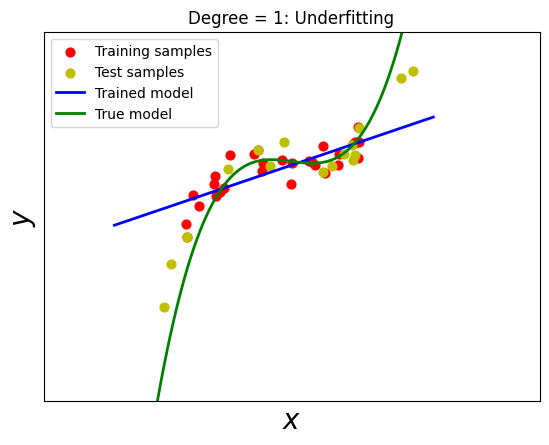

[[-41.90206792  12.66196586]]
(20, 1) (20, 1)


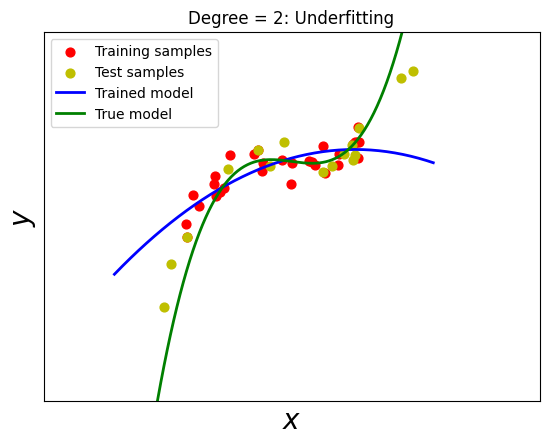

[[-52.79321911  27.33320281  -2.85491906]]
(20, 1) (20, 1)


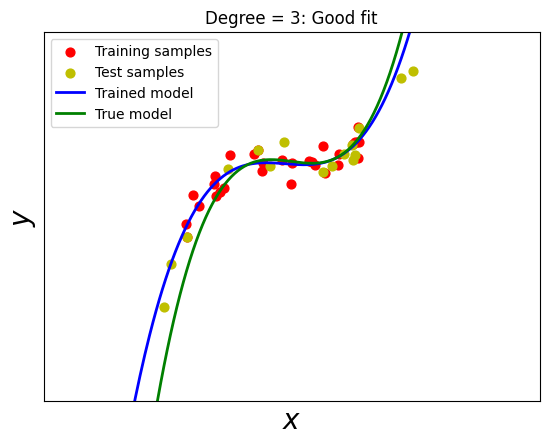

[[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]
(20, 1) (20, 1)


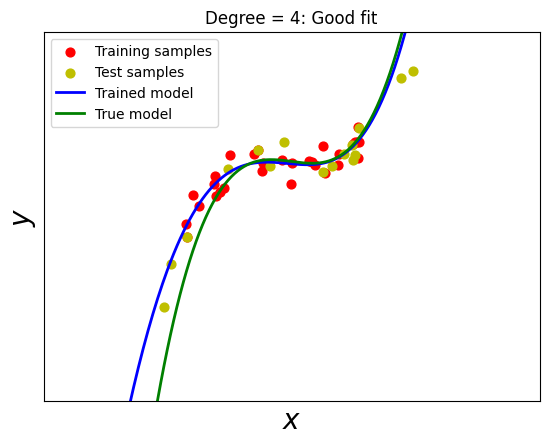

[[-70.11099235  74.66197229 -24.91080481   2.11241837   0.13285956]]
(20, 1) (20, 1)


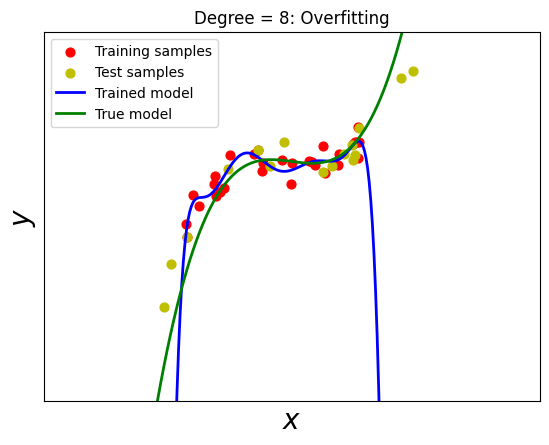

[[-8.31452005e+01  3.47714187e+02 -1.03309551e+03  1.48372383e+03
  -1.08580923e+03  4.36091506e+02 -9.77083149e+01  1.14715264e+01
  -5.50276444e-01]]
(20, 1) (20, 1)


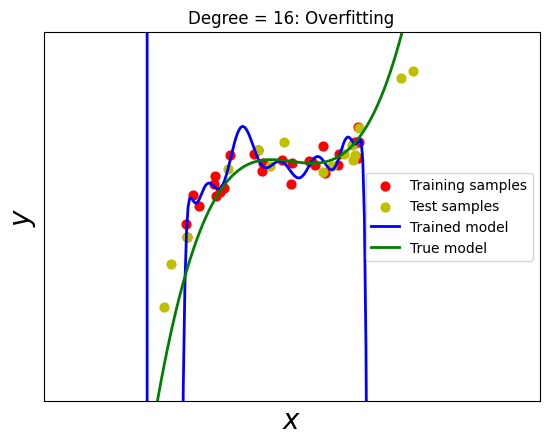

[[-1.13994089e+02  1.48509083e+03 -1.06958457e+04  3.60286257e+04
  -6.18725111e+04  5.04149395e+04 -1.05497988e+03 -3.90916133e+04
   4.21719644e+04 -2.45081623e+04  9.16608848e+03 -2.30833369e+03
   3.91248555e+02 -4.30284072e+01  2.80035927e+00 -8.49700213e-02
   3.06627114e-04]]


In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model

N = 30
N_test = 20
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/8) *10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in range(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in range(d+1):
        y0 += w[0][i]*x0**i

    # Draw the fitting line
    plt.scatter(X.T, y.T, c = 'r', s = 40, label = 'Training samples')     # data
    print(X_test.shape, y_test.shape)
    plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label = 'Test samples')     # data

    plt.plot(x0, y0, 'b', linewidth = 2, label = "Trained model")   # the fitting line
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "True model")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Underfitting'
    elif d > 4:
        str1 = 'Overfitting'
    else:
        str1 = 'Good fit'
    str0 = 'Degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(loc="best")

    fn = 'linreg_' + str(d) + '.png'

    plt.xlabel('$x$', fontsize = 20)
    plt.ylabel('$y$', fontsize = 20)

    plt.savefig(fn, bbox_inches='tight', dpi = 600)

    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)


######**Output**
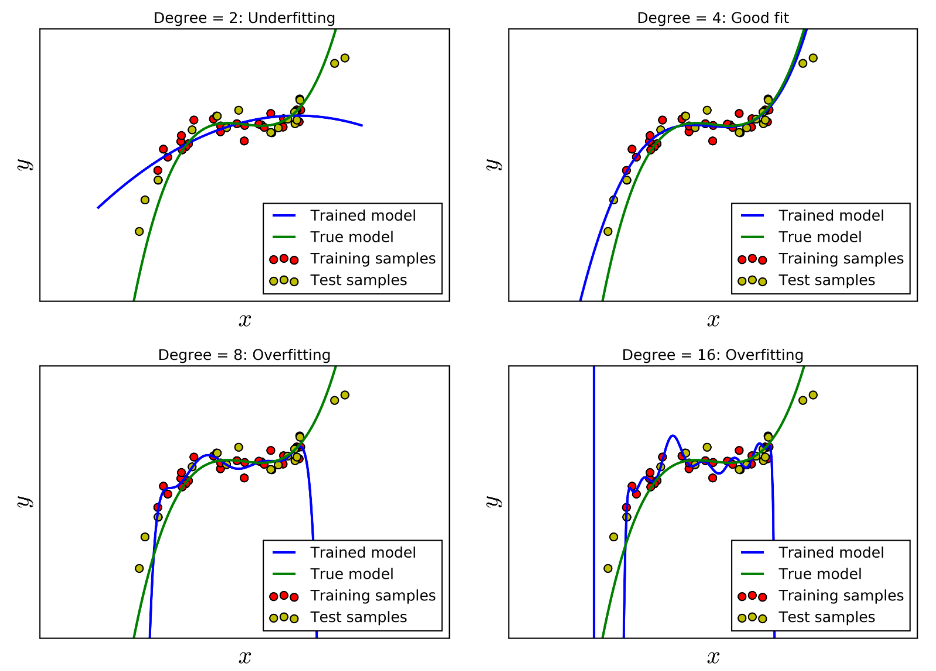

<center><strong>Underfitting và Overfitting với Polynomial Regression</strong></center>


Với loại dữ liệu này, chúng ta có thể áp dụng Polynomial Regression. Bài toán này hoàn toàn có thể được giải quyết bằng Linear Regression với dữ liệu mở rộng cho một cặp điểm (`x`, `y`) với `x` = [1, `x`, `x^2`, `x^3`, …, `x^d`]ᵀ cho đa thức bậc d. Điều quan trọng là chúng ta cần tìm bậc d của đa thức cần tìm.

Một đa thức bậc không vượt quá 29 có thể fit được hoàn toàn với 30 điểm trong tập train. Chúng ta thử xét vài giá trị d = 2, 4, 8, 16.

- Với d = 2, mô hình không thực sự tốt vì mô hình dự đoán quá khác so với mô hình thực. Trong trường hợp này, ta nói mô hình bị **Underfitting**.

- Với d = 8, với các điểm dữ liệu trong khoảng của training data, mô hình dự đoán và mô hình thực là khá giống nhau. Tuy nhiên, về phía phải, đa thức bậc 8 cho kết quả hoàn toàn ngược với xu hướng của dữ liệu.

- Điều tương tự xảy ra trong trường hợp d = 16. Đa thức bậc 16 này quá fit dữ liệu trong khoảng đang xét, (quá fit tức là không được mượt trong khoảng dữ liệu training). Việc quá fit trong trường hợp bậc 16 không tốt vì mô hình đang cố gắng mô tả nhiễu hơn là dữ liệu.
  
 => Hai trường hợp đa thức bậc cao (d = 8, 16) này được gọi là **Overfitting**.

- Với d = 4, ta được mô hình dự đoán khá giống với mô hình thực. Hệ số bậc cao nhất tìm được rất gần với 0 (xem kết quả trong output chi tiết), vì vậy đa thức bậc 4 này khá gần với đa thức bậc 3 ban đầu. Đây chính là một mô hình tốt (Good fit hay còn gọi là Vừa khớp).


###**Tóm gọn lại:**

Về cơ bản, **Overfitting (quá khớp)** là hiện tượng mô hình tìm được quá khớp với dữ liệu training. Việc quá khớp này có thể dẫn đến việc dự đoán nhầm nhiễu, và chất lượng mô hình không còn tốt trên dữ liệu test nữa. Dữ liệu test được giả sử là không được biết trước, và không được sử dụng để xây dựng các mô hình Machine Learning.

Overfitting xảy ra khi mô hình quá phức tạp để mô phỏng training data. Điều này đặc biệt xảy ra khi lượng dữ liệu training quá nhỏ trong khi độ phức tạp của mô hình quá cao. Trong ví dụ ta vừa xét ở trên, độ phức tạp của mô hình có thể được coi là bậc của đa thức cần tìm.

**Underfitting (chưa khớp)** là hiện tượng khi mô hình xây dựng chưa có độ chính xác cao trong tập dữ liệu huấn luyện cũng như tổng quát hóa với tổng thể dữ liệu. Khi hiện tượng Underfitting xảy ra, mô hình đó sẽ không phải là tốt với bất kì bộ dữ liệu nào trong vấn đề đang nhắc tới. Hiện tượng Underfitting thường ít xảy ra trong bài toán hơn. Khi Underfitting xảy ra, ta có thể khắc phục bằng cách thay đổi thuật toán hoặc là bổ sung thêm dữ liệu đầu vào.

Vậy, có những kỹ thuật nào giúp tránh Overfitting?

# **II. Một số kỹ thuật giúp tránh Overfitting**

### **1. Các đại lượng cần biết để đánh giá chất lượng mô hình:**

#### **1.1 Các đại lượng cần biết**:

Trước hết, chúng ta cần một vài đại lượng để đánh giá chất lượng của mô hình trên training data và test data. Dưới đây là hai đại lượng đơn giản, với giả sử **y** là đầu ra thực sự (có thể là vector), và **ŷ** là đầu ra dự đoán bởi mô hình:

##### **Train error**
Thường là hàm mất mát áp dụng lên training data. Hàm mất mát này cần có một thừa số $\frac{1}{N_{\text{train}}}$ để tính giá trị trung bình, tức mất mát trung bình trên mỗi điểm dữ liệu. Với Regression, đại lượng này thường được định nghĩa:

$$
\text{train error} = \frac{1}{N_{\text{train}}} \sum_{\text{training set}} \| y - \hat{y} \|_2^p
$$

với p thường bằng 1 hoặc 2.

Với Classification, trung bình cộng của cross entropy có thể được sử dụng.

##### **Test error**
Tương tự như trên nhưng áp dụng mô hình tìm được vào test data. Chú ý rằng, khi xây dựng mô hình, ta không được sử dụng thông tin trong tập dữ liệu test. Dữ liệu test chỉ được dùng để đánh giá mô hình. Với Regression, đại lượng này thường được định nghĩa:

$$
\text{test error} = \frac{1}{N_{\text{test}}} \sum_{\text{test set}} \| y - \hat{y} \|_2^p
$$

với p giống như p trong cách tính train error phía trên.

Việc lấy trung bình là quan trọng vì lượng dữ liệu trong hai tập hợp training và test có thể chênh lệch rất nhiều.

#### **1.2 Đánh giá chất lượng mô hình**

- Một mô hình được coi là **tốt (Good fit)** nếu **cả train error và test error đều thấp**.
- Một mô hình được coi là **quá khớp (Overfitting)** nếu **train error thấp** nhưng **test error cao**.
- Một mô hình được coi là **chưa khớp (Underfitting)** nếu **train error cao** và **test error cao**.



### **2. Một số phương pháp tránh Overfitting**

####**2.1 Validation**

Ta vẫn quen với việc chia tập dữ liệu ra thành hai tập nhỏ: training data và test data. Khi xây dựng mô hình, ta không được sử dụng test data, vậy làm cách nào để biết được chất lượng của mô hình với Unseen data (tức dữ liệu chưa nhìn thấy bao giờ)?

Phương pháp đơn giản nhất là Validation, tức trích từ tập training data ra một tập con và thực hiện việc đánh giá mô hình trên tập con này. Tập con được trích ra từ training set này được gọi là **validation set**. Lúc này, training set là phần còn lại của training set ban đầu. Train error được tính trên training set mới này, và có một khái niệm nữa được định nghĩa tương tự như trên **validation error**, tức error được tính trên tập validation.

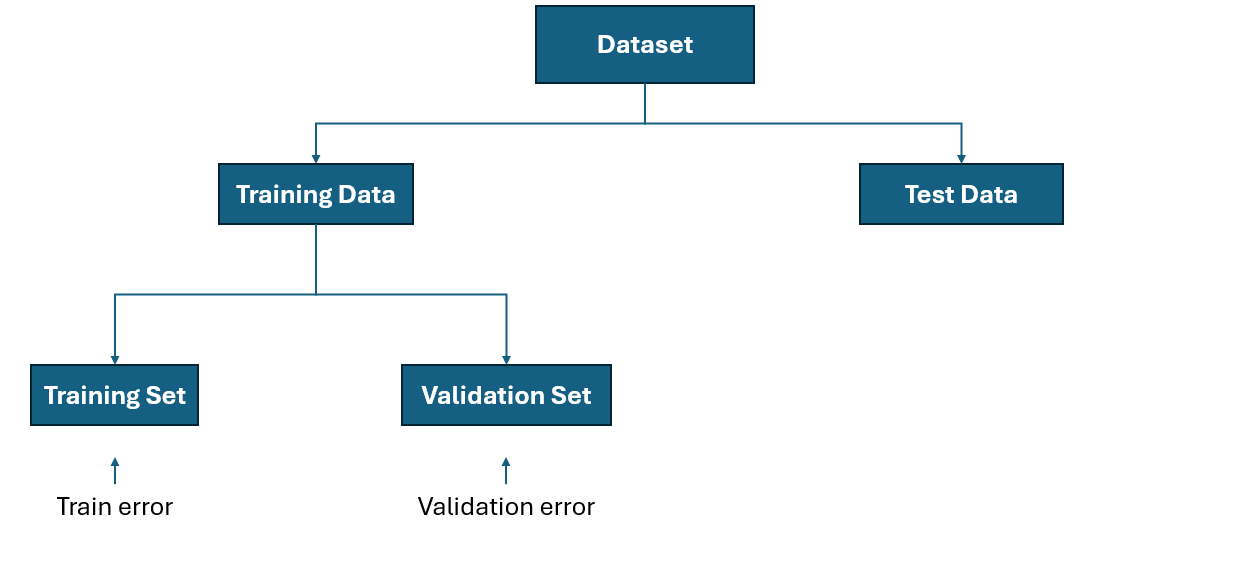

Với khái niệm mới này, ta tìm mô hình sao cho cả train error và validation error đều nhỏ, qua đó có thể dự đoán được rằng test error cũng nhỏ. Phương pháp thường được sử dụng là sử dụng nhiều mô hình khác nhau. Mô hình nào cho validation error nhỏ nhất sẽ là mô hình tốt.



####**2.2 Cross-Validation**

Trong trường hợp Data bị hạn chế (số lượng rất ít), nếu lấy quá nhiều từ training data để làm validation set thì phần training set còn lại là không đủ để xây dựng mô hình.

Lúc này yêu cầu validation set phải thật nhỏ để training set đủ lớn, tuy nhiên nếu validation set nhỏ quá thì hiện tượng Overfitting có thể xảy ra.

Để giải quyết tình huống này, ta sử dụng phương pháp **Cross-Validation**, là một cải tiến của phương pháp Validation với lượng dữ liệu trong validation set là nhỏ nhưng được đánh giá trên nhiều validation set khác nhau.

Một cách thường đường sử dụng là chia training set ra k tập con không có phần tử chung, có kích thước gần bằng nhau. Tại mỗi lần kiểm thử (được gọi là run), một trong số k tập con được lấy ra làm validation set. Mô hình sẽ được xây dựng dựa vào hợp của k−1 tập con còn lại. Mô hình cuối được xác định dựa trên trung bình của các train error và validation error. Cách làm này còn có tên gọi là **k-fold cross validation**.

Khi k bằng với số lượng phần tử trong tập training ban đầu, tức mỗi tập con có đúng 1 phần tử, ta gọi kỹ thuật này là **leave-one-out**

####**2.3 Regularization: Early stopping**


**Regularization**, một cách cơ bản, là thay đổi mô hình một chút để tránh overfitting trong khi vẫn giữ được tính tổng quát của nó (tính tổng quát là tính mô tả được nhiều dữ liệu, trong cả tập training và test). Cụ thể hơn, ta sẽ tìm cách di chuyển nghiệm của bài toán tối ưu hàm mất mát tới một điểm gần nó. Hướng di chuyển sẽ là hướng làm cho mô hình ít phức tạp hơn mặc dù giá trị của hàm mất mát có tăng lên một chút.

Một kỹ thuật rất đơn giản là early stopping.



######**Early Stopping**
Trong nhiều bài toán Machine Learning, chúng ta cần sử dụng các thuật toán lặp để tìm ra nghiệm, ví dụ như Gradient Descent. Nhìn chung, hàm mất mát giảm dần khi số vòng lặp tăng lên. Early stopping tức dừng thuật toán trước khi hàm mất mát đạt giá trị quá nhỏ, giúp tránh overfitting.

Vậy dừng khi nào là phù hợp?

Một kỹ thuật thường được sử dụng là tách từ training set ra một tập validation set như trên. Sau một (hoặc một số, ví dụ 50) vòng lặp, ta tính cả train error và validation error, đến khi validation error có chiều hướng tăng lên thì dừng lại, và quay lại sử dụng mô hình tương ứng với điểm và validation error đạt giá trị nhỏ.

<center><img src="https://machinelearningcoban.com/assets/15_overfitting/EarlyStopping.png"></center>


<center><strong>Early Stopping. Đường màu xanh là train error, đường màu đỏ là validation error. Trục x là số lượng vòng lặp, trục y là error. Mô hình được xác định tại vòng lặp mà validation error đạt giá trị nhỏ nhất. (Overfitting - Wikipedia)</strong></center>


Hình trên đây mô tả cách tìm điểm stopping. Chúng ta thấy rằng phương pháp này khá giống với phương pháp tìm bậc của đa thức ở phần trên của bài viết.

Còn một số phương pháp Regularization khác, ta sẽ tìm hiểu ở buổi 28, hoặc mọi người có thể tham khảo thêm tại [references](https://machinelearningcoban.com/2017/03/04/overfitting/#-gioi-thieu)
